# Tyche Example

## Set up.

### One only needs to execute the following line once, in order to make sure recent enough packages are installed.

In [ ]:
!pip install 'numpy>=1.17.2' 'pandas>=0.25.1'

### Import packages.

In [1]:
import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import re                as re
import scipy.stats       as st

# The `tyche` package is located at <https://github.com/NREL/portfolio/tree/master/production-function/framework/code/tyche/>.
import tyche             as ty

from copy import deepcopy

## Load data.

### The data are stored in a set of tab-separated value files in a folder.

In [2]:
designs = ty.Designs("../data")

### Compile the production and metric functions for each technology in the dataset.

In [3]:
designs.compile()

## Examine the data.

### The `functions` table specifies where the Python code for each technology resides.

In [4]:
designs.functions

,Style,Module,Capital,Fixed,Production,Metrics,Notes
Technology,,,,,,,
Simple electrolysis,numpy,simple_electrolysis,capital_cost,fixed_cost,production,metrics,


Right now, only the style `numpy` is supported.

### The `indices` table defines the subscripts for variables.

In [5]:
designs.indices

Offset  Description Notes
Technology          Type    Index                                 
Simple electrolysis Capital Catalyst          0     Catalyst      
                    Fixed   Rent              0         Rent      
                    Input   Electricity       1  Electricity      
                            Water             0        Water      
                    Metric  Jobs              0         Jobs      
                    Output  Hydrogen          1     Hydrogen      
                            Oxygen            0       Oxygen

### The `designs` table contains the cost, input, efficiency, and price data for a scenario.

In [6]:
designs.designs

Value  \
Technology          Scenario                          Variable          Index                      
Simple electrolysis Base Electrolysis                 Input             Electricity   279.000000   
                                                                        Water          19.040000   
                                                      Input efficiency  Electricity     0.850000   
                                                                        Water           0.950000   
                                                      Input price       Electricity     0.000033   
                                                                        Water           0.004800   
                                                      Lifetime          Catalyst        3.000000   
                                                      Output efficiency Hydrogen        0.900000   
                                                                        Oxygen          0.900000   
                                                      Output price      Hydrogen        0.010000   
                                                                        Oxygen          0.003000   
                                                      Scale             NaN          6650.000000   
                    Fast Progress on Electrolysis     Input             Electricity   279.000000   
                                                                        Water          19.040000   
                                                      Input efficiency  Electricity     0.875000   
                                                                        Water           0.975000   
                                                      Input price       Electricity     0.000033   
                                                                        Water           0.004800   
                                                      Lifetime          Catalyst        3.000000   
                                                      Output efficiency Hydrogen        0.950000   
                                                                        Oxygen          0.950000   
                                                      Output price      Hydrogen        0.010000   
                                                                        Oxygen          0.003000   
                                                      Scale             NaN          6650.000000   
                    Moderate Progress on Electrolysis Input             Electricity   279.000000   
                                                                        Water          19.040000   
                                                      Input efficiency  Electricity     0.875000   
                                                                        Water           0.975000   
                                                      Input price       Electricity     0.000033   
                                                                        Water           0.004800   
                                                      Lifetime          Catalyst        3.000000   
                                                      Output efficiency Hydrogen        0.950000   
                                                                        Oxygen          0.950000   
                                                      Output price      Hydrogen        0.010000   
                                                                        Oxygen          0.003000   
                                                      Scale             NaN          6650.000000   
                    Slow Progress on Electrolysis     Input             Electricity   279.000000   
                                                                        Water          19.040000   
                                                      Input efficiency  Electricity     0.8

### The `parameters` table contains additional techno-economic parameters for each technology.

In [7]:
designs.parameters

Offset  \
Technology          Scenario                          Parameter                                     
Simple electrolysis Base Electrolysis                 Electricity consumption                   3   
                                                      Hydrogen production                       1   
                                                      Jobs                                      4   
                                                      Oxygen production                         0   
                                                      Reference capital cost for catalyst       6   
                                                      Reference fixed cost for rent             7   
                                                      Reference scale                           5   
                                                      Water consumption                         2   
                    Fast Progress on Electrolysis     Electricity consumption                   3   
                                                      Hydrogen production                       1   
                                                      Jobs                                      4   
                                                      Oxygen production                         0   
                                                      Reference capital cost for catalyst       6   
                                                      Reference fixed cost for rent             7   
                                                      Reference scale                           5   
                                                      Water consumption                         2   
                    Moderate Progress on Electrolysis Electricity consumption                   3   
                                                      Hydrogen production                       1   
                                                      Jobs                                      4   
                                                      Oxygen production                         0   
                                                      Reference capital cost for catalyst       6   
                                                      Reference fixed cost for rent             7   
                                                      Reference scale                           5   
                                                      Water consumption                         2   
                    Slow Progress on Electrolysis     Electricity consumption                   3   
                                                      Hydrogen production                       1   
                                                      Jobs                                      4   
                                                      Oxygen production                         0   
                                                      Reference capital cost for catalyst       6   
                                                      Reference fixed cost for rent             7   
                                                      Reference scale                           5   
                                                      Water consumption                         2   

                                                                                                Value  \
Technology          Scenario                          Parameter                                         
Simple electrolysis Base Electrolysis                 Electricity consumption               237.00000   
                                                      Hydrogen production                     2.00000   
                                                      Jobs                                    0.00015   
                                                      Oxygen production                      16.00000   
                          

### The `results` table specifies the units of measure for results of computations.

In [8]:
designs.results

Units Notes
Technology          Variable Index                   
Simple electrolysis Cost     Cost      USD/mole      
                    Metric   Jobs      job/mole      
                    Output   Hydrogen    g/mole      
                             Oxygen      g/mole

### The `tranches` table specifies multually exclusive possibilities for investments: only one `Tranch` may be selected for each `Cateogry`.

In [9]:
designs.tranches

Notes
Category         Tranche                 Scenario                               
Electrolysis R&D High Electrolysis R&D   Fast Progress on Electrolysis          
                 Low Electrolysis R&D    Slow Progress on Electrolysis          
                 Medium Electrolysis R&D Moderate Progress on Electrolysis      
                 No Electrolysis R&D     Base Electrolysis

### The `investments` table bundles a consistent set of tranches (one per category) into an overall investment.

In [10]:
designs.investments

,,Tranche,Amount,Notes
Investment,Category,,,
High R&D Spending,Electrolysis R&D,High Electrolysis R&D,5000000.0,
Low R&D Spending,Electrolysis R&D,Low Electrolysis R&D,1000000.0,
Medium R&D Spending,Electrolysis R&D,Medium Electrolysis R&D,2500000.0,
No R&D Spending,Electrolysis R&D,No Electrolysis R&D,0.0,


## Evaluate the designs in the dataset.

In [11]:
results = designs.evaluate_scenarios()

In [12]:
results

Value  \
Technology          Scenario                          Variable Index                 
Simple electrolysis Base Electrolysis                 Cost     Cost       0.183900   
                                                      Metric   Jobs       0.000150   
                                                      Output   Hydrogen   1.800796   
                                                               Oxygen    14.406372   
                    Fast Progress on Electrolysis     Cost     Cost       0.181315   
                                                      Metric   Jobs       0.000150   
                                                      Output   Hydrogen   1.950863   
                                                               Oxygen    15.606903   
                    Moderate Progress on Electrolysis Cost     Cost       0.181315   
                                                      Metric   Jobs       0.000150   
                                                      Output   Hydrogen   1.950863   
                                                               Oxygen    15.606903   
                    Slow Progress on Electrolysis     Cost     Cost       0.181315   
                                                      Metric   Jobs       0.000150   
                                                      Output   Hydrogen   1.950863   
                                                               Oxygen    15.606903   

                                                                            Units  
Technology          Scenario                          Variable Index               
Simple electrolysis Base Electrolysis                 Cost     Cost      USD/mole  
                                                      Metric   Jobs      job/mole  
                                                      Output   Hydrogen    g/mole  
                                                               Oxygen      g/mole  
                    Fast Progress on Electrolysis     Cost     Cost      USD/mole  
                                                      Metric   Jobs      job/mole  
                                                      Output   Hydrogen    g/mole  
                                                               Oxygen      g/mole  
                    Moderate Progress on Electrolysis Cost     Cost      USD/mole  
                                                      Metric   Jobs      job/mole  
                                                      Output   Hydrogen    g/mole  
                                                               Oxygen      g/mole  
                    Slow Progress on Electrolysis     Cost     Cost      USD/mole  
                                                      Metric   Jobs      job/mole  
                                                      Output   Hydrogen    g/mole  
                                                               Oxygen      g/mole

## Sensitity analysis.

### Vary the four efficiencies in the design.

In [13]:
# Four variables are involved.
variables = [
    ("Input efficiency" , "Water"      ),
    ("Input efficiency" , "Electricity"),
    ("Output efficiency", "Oxygen"     ),
    ("Output efficiency", "Hydrogen"   ),
]

In [14]:
# Let efficiencies range from 0.75 to 0.975.
efficiencies = np.arange(0.750, 1.000, 0.025)
efficiencies

array([0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875, 0.9  , 0.925, 0.95 ,
       0.975])

### Start from the base case.

In [15]:
base_design = designs.designs.xs("Base Electrolysis", level=1, drop_level=False)
base_design

Value  \
Technology          Scenario          Variable          Index                      
Simple electrolysis Base Electrolysis Input             Electricity   279.000000   
                                                        Water          19.040000   
                                      Input efficiency  Electricity     0.850000   
                                                        Water           0.950000   
                                      Input price       Electricity     0.000033   
                                                        Water           0.004800   
                                      Lifetime          Catalyst        3.000000   
                                      Output efficiency Hydrogen        0.900000   
                                                        Oxygen          0.900000   
                                      Output price      Hydrogen        0.010000   
                                                        Oxygen          0.003000   
                                      Scale             NaN          6650.000000   

                                                                        Units  \
Technology          Scenario          Variable          Index                   
Simple electrolysis Base Electrolysis Input             Electricity   kJ/mole   
                                                        Water          g/mole   
                                      Input efficiency  Electricity         1   
                                                        Water               1   
                                      Input price       Electricity    USD/kJ   
                                                        Water        USD/mole   
                                      Lifetime          Catalyst           yr   
                                      Output efficiency Hydrogen            1   
                                                        Oxygen              1   
                                      Output price      Hydrogen        USD/g   
                                                        Oxygen          USD/g   
                                      Scale             NaN           mole/yr   

                                                                                                     Notes  
Technology          Scenario          Variable          Index                                               
Simple electrolysis Base Electrolysis Input             Electricity                                         
                                                        Water                                               
                                      Input efficiency  Electricity                                         
                                                        Water                                               
                                      Input price       Electricity                                         
                                                        Water                                               
                                      Lifetime          Catalyst     Effective lifetime of Al-Ni catalyst.  
                                      Output efficiency Hydrogen                                            
                                                        Oxygen                                              
                                      Output price      Hydrogen                                            
                                                        Oxygen                                              
                                      Scale             NaN                Rough estimate for a 50W setup.

In [16]:
base_parameters = designs.parameters.xs("Base Electrolysis", level=1, drop_level=False)
base_parameters

Offset  \
Technology          Scenario          Parameter                                     
Simple electrolysis Base Electrolysis Electricity consumption                   3   
                                      Hydrogen production                       1   
                                      Jobs                                      4   
                                      Oxygen production                         0   
                                      Reference capital cost for catalyst       6   
                                      Reference fixed cost for rent             7   
                                      Reference scale                           5   
                                      Water consumption                         2   

                                                                                Value  \
Technology          Scenario          Parameter                                         
Simple electrolysis Base Electrolysis Electricity consumption               237.00000   
                                      Hydrogen production                     2.00000   
                                      Jobs                                    0.00015   
                                      Oxygen production                      16.00000   
                                      Reference capital cost for catalyst     0.63000   
                                      Reference fixed cost for rent        1000.00000   
                                      Reference scale                      6650.00000   
                                      Water consumption                      18.08000   

                                                                              Units  \
Technology          Scenario          Parameter                                       
Simple electrolysis Base Electrolysis Electricity consumption                    kJ   
                                      Hydrogen production                         g   
                                      Jobs                                 job/mole   
                                      Oxygen production                           g   
                                      Reference capital cost for catalyst       USD   
                                      Reference fixed cost for rent          USD/yr   
                                      Reference scale                       mole/yr   
                                      Water consumption                           g   

                                                                          Notes  
Technology          Scenario          Parameter                                  
Simple electrolysis Base Electrolysis Electricity consumption                    
                                      Hydrogen production                        
                                      Jobs                                       
                                      Oxygen production                          
                                      Reference capital cost for catalyst        
                                      Reference fixed cost for rent              
                                      Reference scale                            
                                      Water consumption

### Generate the new scenarios and append them to the previous ones.

In [23]:
sensitivities = deepcopy(designs)
sensitivities.designs = sensitivities.designs[0:0]
sensitivities.parameters = sensitivities.parameters[0:0]

In [24]:
# Iterate over variables and efficiencies.
for variable, index in variables:
    for efficiency in efficiencies:

        # Name the scenario.
        scenario = "Let " + variable + " @ " + index + " = " + str(round(efficiency, 3))
        
        # Alter the base case.
        vary_design = base_design.rename(index={"Base Electrolysis" : scenario}, level=1)
        vary_design.loc[("Simple electrolysis", scenario, variable, index), "Value"] = efficiency
        
        # Keep the parameters the same.
        vary_parameters = base_parameters.rename(index={"Base Electrolysis" : scenario}, level=1)
        
        # Append the results to the existing table of scenarios.
        sensitivities.designs = sensitivities.designs.append(vary_design)
        sensitivities.parameters = sensitivities.parameters.append(vary_parameters)

#### See how many rows there are in the tables now.

In [25]:
sensitivities.designs.shape

(480, 3)

In [26]:
sensitivities.parameters.shape

(320, 4)

### Compute the results.

In [27]:
results = sensitivities.evaluate_scenarios()
results

Value  \
Technology          Scenario                                   Variable Index                 
Simple electrolysis Let Input efficiency @ Electricity = 0.75  Cost     Cost       0.190164   
                                                               Metric   Jobs       0.000150   
                                                               Output   Hydrogen   1.589241   
                                                                        Oxygen    12.713924   
                    Let Input efficiency @ Electricity = 0.775 Cost     Cost       0.188595   
...                                                                                     ...   
                    Let Output efficiency @ Oxygen = 0.95      Output   Oxygen    15.206726   
                    Let Output efficiency @ Oxygen = 0.975     Cost     Cost       0.180298   
                                                               Metric   Jobs       0.000150   
                                                               Output   Hydrogen   1.800796   
                                                                        Oxygen    15.606903   

                                                                                     Units  
Technology          Scenario                                   Variable Index               
Simple electrolysis Let Input efficiency @ Electricity = 0.75  Cost     Cost      USD/mole  
                                                               Metric   Jobs      job/mole  
                                                               Output   Hydrogen    g/mole  
                                                                        Oxygen      g/mole  
                    Let Input efficiency @ Electricity = 0.775 Cost     Cost      USD/mole  
...                                                                                    ...  
                    Let Output efficiency @ Oxygen = 0.95      Output   Oxygen      g/mole  
                    Let Output efficiency @ Oxygen = 0.975     Cost     Cost      USD/mole  
                                                               Metric   Jobs      job/mole  
                                                               Output   Hydrogen    g/mole  
                                                                        Oxygen      g/mole  

[160 rows x 2 columns]

### Plot the cost results.

In [28]:
cost_results = results.xs("Cost", level=3).reset_index()[["Scenario", "Value"]]

In [29]:
cost_results["Variable"  ] = cost_results["Scenario"].apply(lambda x: re.sub(r'^Let (.*) @ (.*) =.*$', '\\1[\\2]', x))
cost_results["Efficiency"] = cost_results["Scenario"].apply(lambda x: float(re.sub(r'^.*= (.*)$', '\\1', x)))
cost_results["Cost [USD/mole]"] = cost_results["Value"]

In [30]:
cost_results = cost_results[["Variable", "Efficiency", "Cost [USD/mole]"]]
cost_results[1:10]

,Variable,Efficiency,Cost [USD/mole]
1,Input efficiency[Electricity],0.775,0.188595
2,Input efficiency[Electricity],0.800,0.187026
3,Input efficiency[Electricity],0.825,0.185457
4,Input efficiency[Electricity],0.850,0.183900
5,Input efficiency[Electricity],0.875,0.184132
6,Input efficiency[Electricity],0.900,0.184364
7,Input efficiency[Electricity],0.925,0.184597
8,Input efficiency[Electricity],0.950,0.184829
9,Input efficiency[Electricity],0.975,0.185061


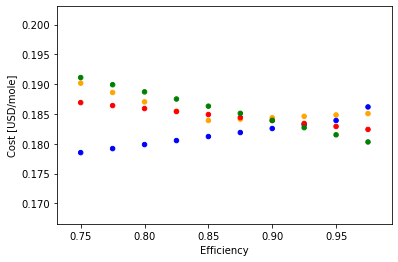

In [31]:
# Here is a really simple plot.
cost_results.plot(
    x="Efficiency",
    y="Cost [USD/mole]",
    c=cost_results["Variable"].apply(lambda v: {
        "Input efficiency[Water]"       : "blue"  ,
        "Input efficiency[Electricity]" : "orange",
        "Output efficiency[Oxygen]"     : "green" ,
        "Output efficiency[Hydrogen]"   : "red"   ,
    }[v]),
    kind="scatter"
)